#Problem Statement:

Design a project from the MNIST dataset to identify digit classification using the SVM algorithm.

## MNIST Digits - Classification Using SVM
In this notebook, we'll explore the popular MNIST dataset and build an SVM model to classify handwritten digits.
We'll divide the analysis into the following parts:

- Data understanding
- Data preparation for model building
- Building an SVM model using SVC with kernel linear and rbf
- You can get more info about datasets here
    https://www.kaggle.com/c/digit-recognizer

## Loading Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [ ]:
digit_data = pd.read_csv('/content/digit_svm.csv')

In [ ]:
digit_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Undestanding

In [ ]:
digit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
digit_data.isna().sum(axis=1) # nan values horizontal summation

0        0
1        0
2        0
3        0
4        0
        ..
41995    0
41996    0
41997    0
41998    0
41999    0
Length: 42000, dtype: int64

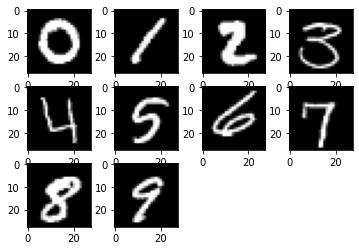

In [ ]:
for x in list(range(10)):
  number = digit_data.iloc[digit_data[digit_data["label"]==x].index[0], 1:].values.reshape(28, 28)
  plt.subplot(3,4,x+1)
  digits = plt.imshow(number, cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


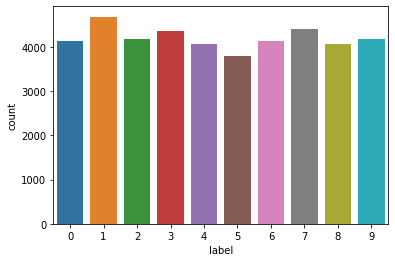

In [ ]:
sns.countplot(digit_data['label'])

## Data Modeling and Prediction
- SVM Model using Linear and RBF Kernels

In [ ]:
X = digit_data.iloc[:,1:]
y = digit_data.iloc[:,0]

In [ ]:
#creating the function for loading dataset
def load_dataset():
    trainx,testx,trainy,testy = train_test_split(X, y, test_size=0.33, random_state=100)
    trainx=np.array(trainx)
    testx=np.array(testx)
    trainy=np.array(trainy)
    testy=np.array(testy)
    return trainx,testx,trainy,testy

In [ ]:
#creating the function for the preparation of dataset
def prep_dataset(train,test):
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    return train_norm,test_norm

In [ ]:
#creating the function for defining and fittng the model
def def_fit_models(trainx,testx,trainy,testy): 
    svc_linear_model=SVC(kernel='linear')
    svc_rbf_model=SVC()
    model_fit_linear = svc_linear_model.fit(trainx,trainy)
    model_fit_rbf = svc_rbf_model.fit(trainx, trainy)
    return model_fit_linear,model_fit_rbf 

In [ ]:
#function for analyzing the results
def analyze(model_fit_linear,model_fit_rbf,testx,testy):
    predy_linear=model_fit_linear.predict(testx)    
    precision_lin,recall_lin,fscore_lin,support_lin=score(testy,predy_linear)
    print('Accuracy Score of testing data for linear model - ',accuracy_score(testy, predy_linear))

    predy_rbf=model_fit_rbf.predict(testx)
    precision_rbf,recall_rbf,fscore_rbf,support_rbf=score(testy,predy_rbf)
    print('Accuracy Score of testing data for rbf model - ',accuracy_score(testy, predy_rbf))

    matplotlib.rcParams['figure.figsize'] = (15,15)
    plt.subplot(3,1,1)
    plt.plot(support_lin,'o')
    plt.plot(support_rbf)
    plt.legend(["support linear","support rbf"])

    plt.subplot(3,1,2)
    plt.plot(fscore_lin,'o-.m')
    plt.plot(precision_lin,'*-')
    plt.plot(recall_lin,'P--')
    plt.title("CLASSIFICATION REPORT LINEAR")
    plt.legend(["F1-Score","Precision","Recall"])
    
    plt.subplot(3,1,3)
    plt.plot(fscore_rbf,'o-.m')
    plt.plot(precision_rbf,'*-')
    plt.plot(recall_rbf,'P--')
    plt.title("CLASSIFICATION REPORT RBF")
    plt.xlabel("Digits",fontsize=16)
    plt.legend(["F1-Score","Precision","Recall"])
    plt.show()

In [ ]:
#finally, calling all the functions
def run():
    trainx,testx,trainy,testy=load_dataset()
    trainx,testx=prep_dataset(trainx,testx)
    model_fit_linear,model_fit_rbf = def_fit_models(trainx,testx,trainy,testy)
    analyze(model_fit_linear,model_fit_rbf,testx,testy)

Accuracy Score of testing data for linear model -  0.9267676767676768
Accuracy Score of testing data for rbf model -  0.9735930735930736


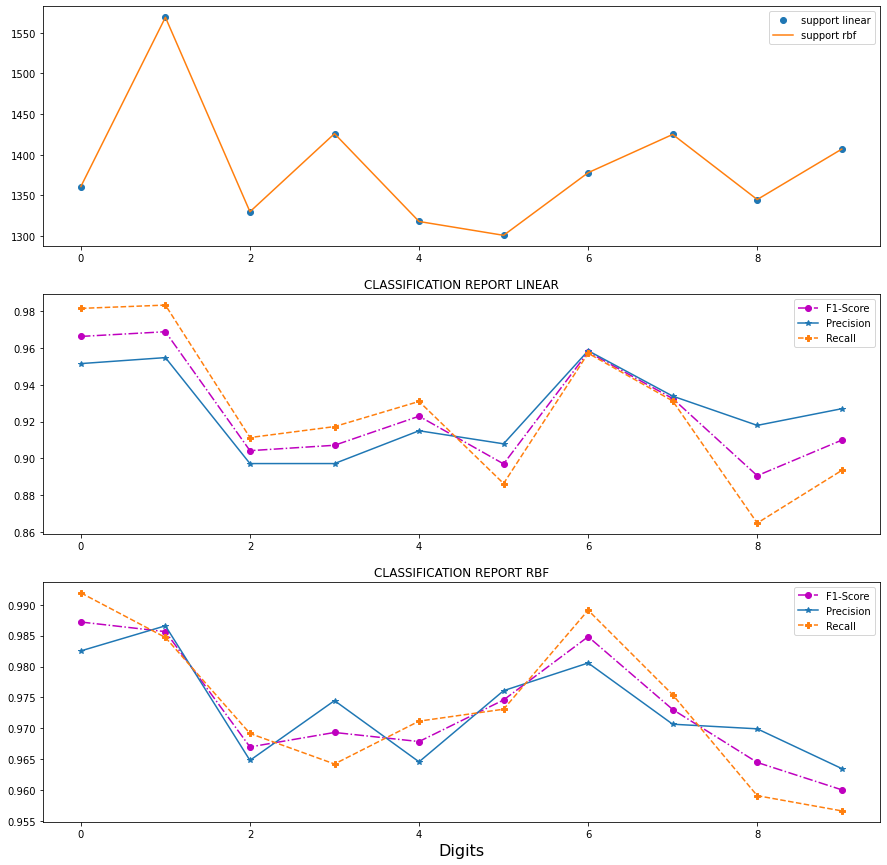

In [ ]:
run()

- Enjoyed working with this Dataset
- Hope, you like it :)
